In [2]:
import numpy as np
import pandas as pd
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df=pd.read_csv("/content/music_dataset.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [6]:
df['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

countplot

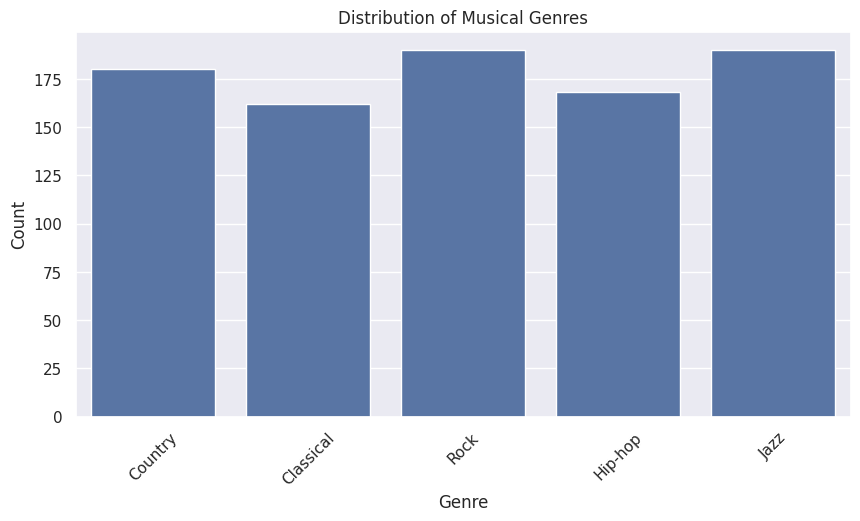

In [15]:
plt.figure(figsize=(10,5))
sns.countplot(df, x='Genre')
plt.xticks(rotation=45)
plt.title('Distribution of Musical Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [16]:
df_clean = df.dropna(subset=['Genre'])

In [18]:
df.head()

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [19]:
X = df_clean.drop(columns=['Genre'])
y = df_clean['Genre']

In [20]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Genre' column
y_encoded = label_encoder.fit_transform(y)

# Check the first few encoded values
print(y_encoded[:10])


[1 0 4 2 1 4 2 1 1 1]


In [21]:
df_clean['Genre_encoded'] = y_encoded
df_updated = df_clean.drop(columns=['Genre'])
print(df_updated.head())

        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   
1          85.421085       100.455908       

<ipython-input-21-0a3418f40ac5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Genre_encoded'] = y_encoded


In [22]:
# Generate the correlation matrix
correlation_matrix = df_updated.corr()

# Display the correlation matrix
print(correlation_matrix)


                                Tempo  Dynamics Range  Vocal Presence  \
Tempo                        1.000000       -0.019799        0.019506   
Dynamics Range              -0.019799        1.000000        0.026418   
Vocal Presence               0.019506        0.026418        1.000000   
Percussion Strength          0.041447       -0.037116        0.012152   
String Instrument Detection -0.074421        0.127534       -0.056417   
Electronic Element Presence  0.009629       -0.204273        0.001731   
Rhythm Complexity            0.018964        0.047814        0.041511   
Drums Influence              0.389400       -0.008319        0.071056   
Distorted Guitar             0.040765       -0.373529        0.005659   
Metal Frequencies            0.033752       -0.364005        0.012855   
Ambient Sound Influence      0.039567       -0.014778        0.041722   
Instrumental Overlaps       -0.038901        0.015526       -0.053142   
Genre_encoded                0.113906       -0.4626

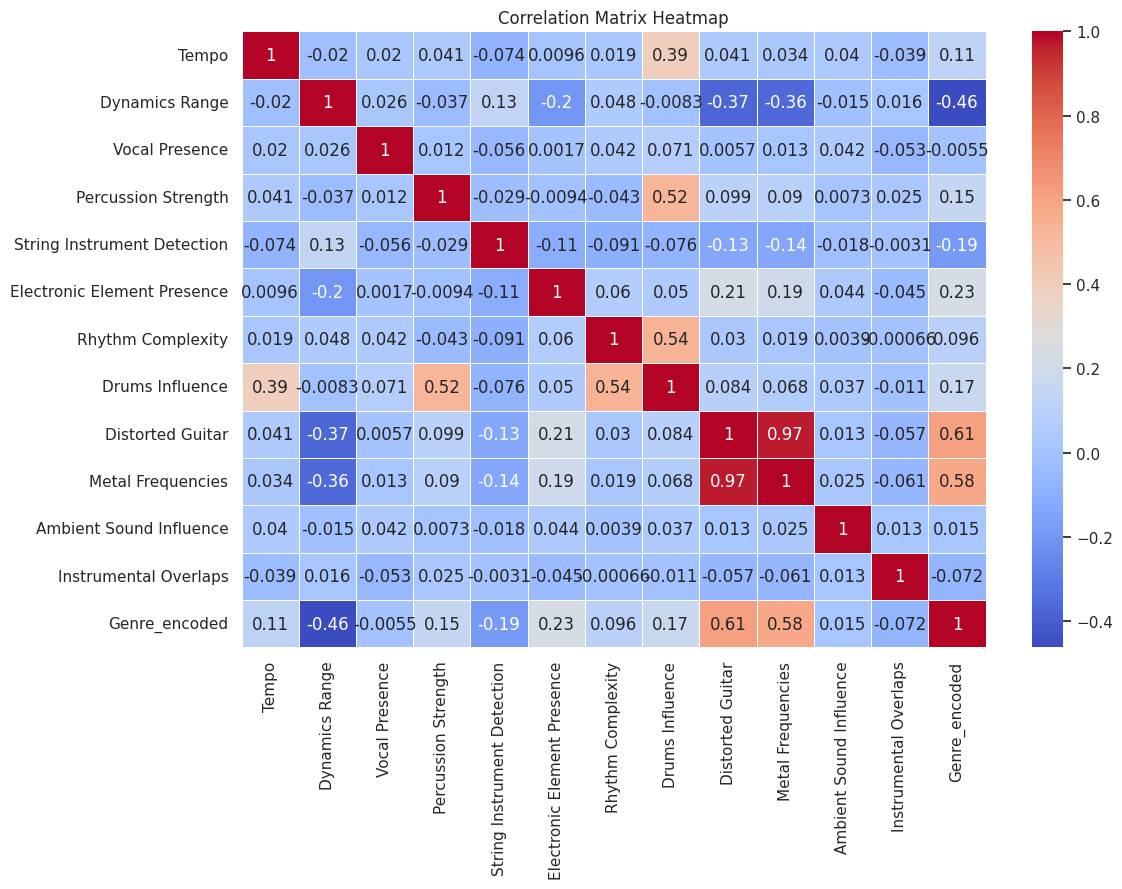

In [23]:
# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add titles and labels
plt.title('Correlation Matrix Heatmap')
plt.show()


In [24]:
X = df_updated.drop(columns=['Genre_encoded'])
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [27]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)


[0.20063071 0.15062807 0.09369199 0.08696907 0.08536054 0.08167379
 0.07948271 0.07613474 0.07000221 0.05996203 0.01267309 0.00279105]


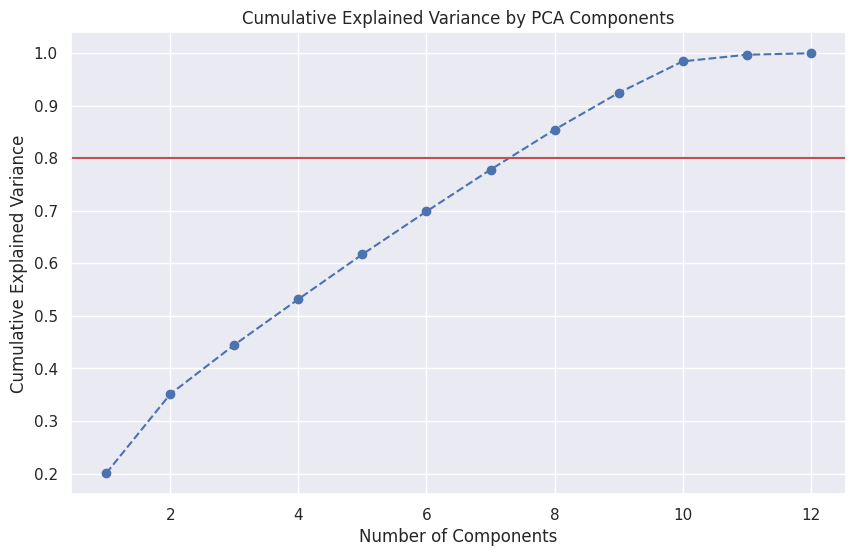

In [29]:
# Cumulative variance
cumulative_variance = np.cumsum(explained_variance_ratio)
# Plot the cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.axhline(y=0.80, color='r', linestyle='-')
plt.show()

In [30]:
# Choose the number of components that capture at least 80% of variance
n_components = np.argmax(cumulative_variance >= 0.80) + 1

# Reapply PCA with the chosen number of components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

# Check the shape of the transformed data
print(f'Number of components: {n_components}')
print(f'Shape of transformed data: {X_pca_final.shape}')


Number of components: 8
Shape of transformed data: (890, 8)


In [31]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_final, y_encoded, test_size=0.3, random_state=42)

In [32]:
# Train Logistic Regression model on PCA data
logreg_pca = LogisticRegression(max_iter=10000, random_state=42)
logreg_pca.fit(X_train_pca, y_train_pca)

# Model prediction and evaluation on PCA data
y_pred_pca = logreg_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
classification_report_pca = classification_report(y_test_pca, y_pred_pca)

print(f'Accuracy on PCA-transformed data: {accuracy_pca}')
print('Classification Report for PCA-transformed data:')
print(classification_report_pca)


Accuracy on PCA-transformed data: 0.5355805243445693
Classification Report for PCA-transformed data:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        51
           1       0.32      0.23      0.27        52
           2       0.49      0.44      0.46        48
           3       0.41      0.42      0.42        62
           4       0.51      0.63      0.56        54

    accuracy                           0.54       267
   macro avg       0.52      0.54      0.53       267
weighted avg       0.52      0.54      0.52       267



In [33]:
# Split the original scaled features and encoded target into training and test sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

# Train Logistic Regression model on original data
logreg_orig = LogisticRegression(max_iter=10000, random_state=42)
logreg_orig.fit(X_train_orig, y_train_orig)

# Model prediction and evaluation on original data
y_pred_orig = logreg_orig.predict(X_test_orig)
accuracy_orig = accuracy_score(y_test_orig, y_pred_orig)
classification_report_orig = classification_report(y_test_orig, y_pred_orig)

print(f'Accuracy on original data: {accuracy_orig}')
print('Classification Report for original data:')
print(classification_report_orig)


Accuracy on original data: 0.5318352059925093
Classification Report for original data:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        51
           1       0.33      0.25      0.29        52
           2       0.45      0.46      0.45        48
           3       0.44      0.39      0.41        62
           4       0.49      0.59      0.54        54

    accuracy                           0.53       267
   macro avg       0.52      0.54      0.52       267
weighted avg       0.51      0.53      0.52       267



In [34]:
missing_genre_data = df[df['Genre'].isnull()]
# Prepare data by removing the Genre column
X_missing = missing_genre_data.drop(columns=['Genre'])

In [35]:
# Standardize the missing genre data
X_missing_scaled = scaler.transform(X_missing)

# Apply PCA transformation if PCA model was used
X_missing_pca = pca_final.transform(X_missing_scaled)


In [36]:
# Predict the genres for the missing data using the PCA-transformed model
predicted_genres_pca = logreg_pca.predict(X_missing_pca)


In [37]:
# Convert numeric predictions to original genre labels
predicted_genre_labels = label_encoder.inverse_transform(predicted_genres_pca)


In [38]:
# Update the original DataFrame with the predicted genres
df.loc[df['Genre'].isnull(), 'Genre'] = predicted_genre_labels


In [39]:
# Display the first few rows of the updated DataFrame to verify
print(df.head())


        Tempo  Dynamics Range  Vocal Presence  Percussion Strength  \
0  114.618354       57.976367       53.251766            99.061840   
1  116.672803       69.387087       95.787280            90.831033   
2  128.328121       52.930677       65.701187           104.439247   
3  128.511337       25.494755       14.095374            40.106130   
4  135.474190       45.174876      101.469872            70.002203   

   String Instrument Detection  Electronic Element Presence  \
0                    14.686768                    17.628630   
1                    47.280419                   -15.618194   
2                     5.984994                    50.467388   
3                    47.715584                    87.335201   
4                   108.177637                    25.865590   

   Rhythm Complexity  Drums Influence  Distorted Guitar  Metal Frequencies  \
0          46.545522        75.839434         79.378892          71.753088   
1          85.421085       100.455908       

to find track 992


In [40]:
# Isolate track number 992
track_992 = df.loc[992, :].drop('Genre')

# Display the isolated track's data
print(track_992)


Tempo                          117.892313
Dynamics Range                  35.001524
Vocal Presence                  76.506358
Percussion Strength              77.97257
String Instrument Detection     80.765657
Electronic Element Presence     13.759213
Rhythm Complexity               59.985923
Drums Influence                 80.108786
Distorted Guitar                93.831262
Metal Frequencies                   100.0
Ambient Sound Influence         15.851851
Instrumental Overlaps           47.984445
Name: 992, dtype: object


In [41]:
# Prepare the data by transforming it
track_992_scaled = scaler.transform([track_992])
track_992_pca = pca_final.transform(track_992_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
# Predict the genre for track number 992
predicted_genre_992 = logreg_pca.predict(track_992_pca)

# Convert the numeric prediction to the original genre label
predicted_genre_label_992 = label_encoder.inverse_transform(predicted_genre_992)

# Display the predicted genre
print(f'The predicted genre for track number 992 is: {predicted_genre_label_992[0]}')



The predicted genre for track number 992 is: Rock
